In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,683 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121666 files and dire

In [3]:
filename = '/content/drive/MyDrive/Colab Notebooks/데처프/과제/Sleep_health_and_lifestyle_dataset.csv'
data = pd.read_csv(filename, encoding='CP949')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
data.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [6]:
selected_columns = ['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Sleep Disorder']
lifestyle_df = data[selected_columns]
lifestyle_df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Sleep Disorder
0,Male,27,6.1,6,42,6,None
1,Male,28,6.2,6,60,8,None
2,Male,28,6.2,6,60,8,None
3,Male,28,5.9,4,30,8,Sleep Apnea
4,Male,28,5.9,4,30,8,Sleep Apnea


In [7]:
for i in lifestyle_df.columns:
  print(i, lifestyle_df[i].unique())
  print()

Gender ['Male' 'Female']

Age [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]

Sleep Duration [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]

Quality of Sleep [6 4 7 5 8 9]

Physical Activity Level [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]

Stress Level [6 8 7 4 3 5]

Sleep Disorder ['None' 'Sleep Apnea' 'Insomnia']



In [9]:
lifestyle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Sleep Duration           374 non-null    float64
 3   Quality of Sleep         374 non-null    int64  
 4   Physical Activity Level  374 non-null    int64  
 5   Stress Level             374 non-null    int64  
 6   Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 20.6+ KB


In [10]:
def setAgeGroup(x):
  if x >= 20 and x < 30:
    return '20대'
  elif x >= 30 and x < 40:
    return '30대'
  elif x >= 40 and x < 50:
    return '40대'
  elif x >= 50 and x < 60:
    return '50대'

In [12]:
lifestyle_df['Ageg'] = lifestyle_df['Age'].apply(setAgeGroup)
lifestyle_df['Ageg'].unique()

<ipython-input-12-f7ae74fa622f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifestyle_df['Ageg'] = lifestyle_df['Age'].apply(setAgeGroup)


array(['20대', '30대', '40대', '50대'], dtype=object)

In [11]:
def setSleepDisorder(x):
  if x == 'Sleep Apnea' or x == 'Insomnia':
    return '있음'
  elif x == 'None':
    return '없음'

In [13]:
lifestyle_df['Sleep Disorder'] = lifestyle_df['Sleep Disorder'].apply(setSleepDisorder)
lifestyle_df['Sleep Disorder'].unique()

<ipython-input-13-2eb313e47bf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifestyle_df['Sleep Disorder'] = lifestyle_df['Sleep Disorder'].apply(setSleepDisorder)


array(['없음', '있음'], dtype=object)

In [14]:
for i in lifestyle_df.columns:
  print(i, lifestyle_df[i].unique())
  print()

Gender ['Male' 'Female']

Age [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]

Sleep Duration [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]

Quality of Sleep [6 4 7 5 8 9]

Physical Activity Level [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]

Stress Level [6 8 7 4 3 5]

Sleep Disorder ['없음' '있음']

Ageg ['20대' '30대' '40대' '50대']



In [15]:
# 컬럼을 한글로 변경
col_mapping = {'Gender':'성별', 'Age':'나이', 'Sleep Duration':'수면 시간', 'Quality of Sleep':'수면의 질', 'Physical Activity Level':'신체 활동 수준', 'Stress Level':'스트레스 수준', 'Sleep Disorder':'수면 장애', 'Ageg':'연령대'}
lifestyle_df = lifestyle_df.rename(columns = col_mapping)
lifestyle_df.head()

,성별,나이,수면 시간,수면의 질,신체 활동 수준,스트레스 수준,수면 장애,연령대
0,Male,27,6.1,6,42,6,없음,20대
1,Male,28,6.2,6,60,8,없음,20대
2,Male,28,6.2,6,60,8,없음,20대
3,Male,28,5.9,4,30,8,있음,20대
4,Male,28,5.9,4,30,8,있음,20대


In [16]:
plt.rc('font', family='NanumBarunGothic')

In [17]:
CHART_NAME = 'sleepQuality'
cnt, PNG, UNDERBAR = 0, '.png', '_'

def FileSave():
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + ' 파일이 저장되었습니다.')

##수면의 질 분포

sleepQuality_01.png 파일이 저장되었습니다.


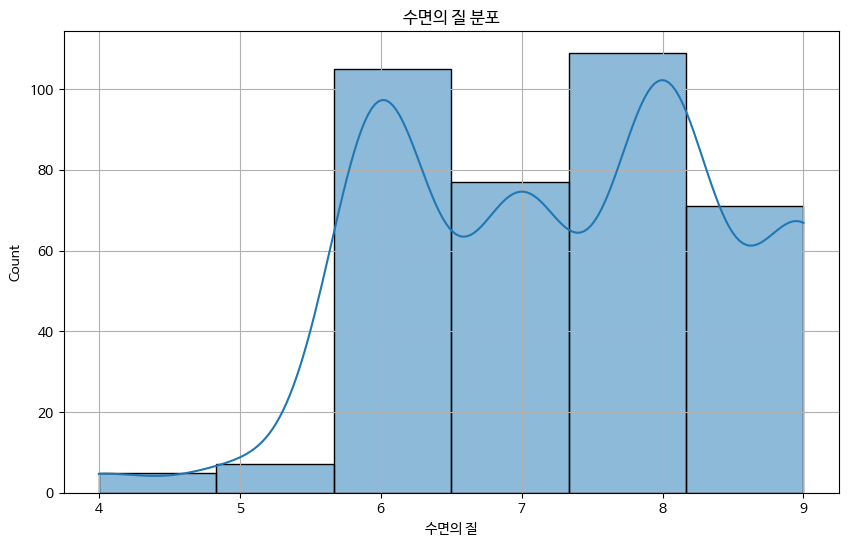

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(lifestyle_df['수면의 질'], bins=6, kde=True)
plt.title('수면의 질 분포')
plt.grid()
#plt.show()
FileSave()

##연령대 분포

sleepQuality_02.png 파일이 저장되었습니다.


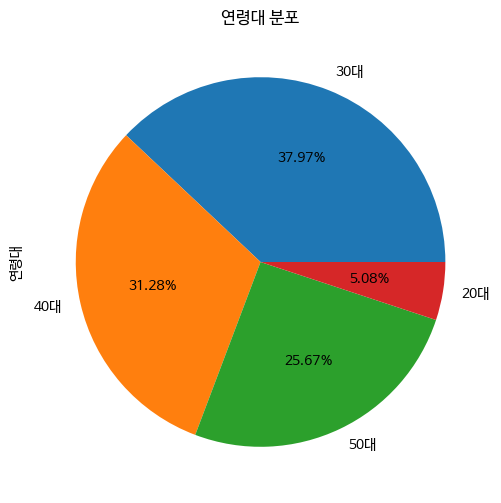

In [19]:
plt.figure(figsize=(10, 6))
lifestyle_df['연령대'].value_counts().plot.pie(autopct='%0.2f%%')
plt.title('연령대 분포')
#plt.show()
FileSave()

##연령대에 따른 수면의 질 분포

sleepQuality_03.png 파일이 저장되었습니다.


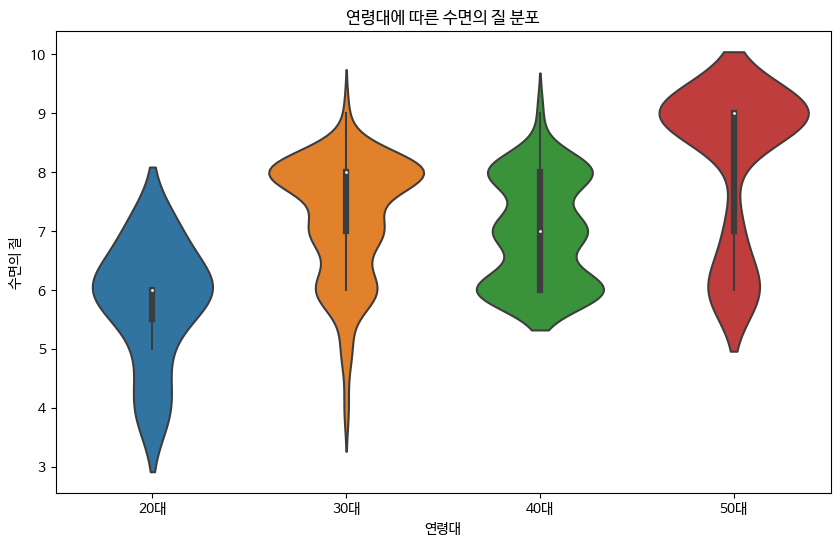

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='연령대', y='수면의 질', data=lifestyle_df)
plt.title('연령대에 따른 수면의 질 분포')
#plt.show()
FileSave()

##수면 장애 여부 분포

sleepQuality_04.png 파일이 저장되었습니다.


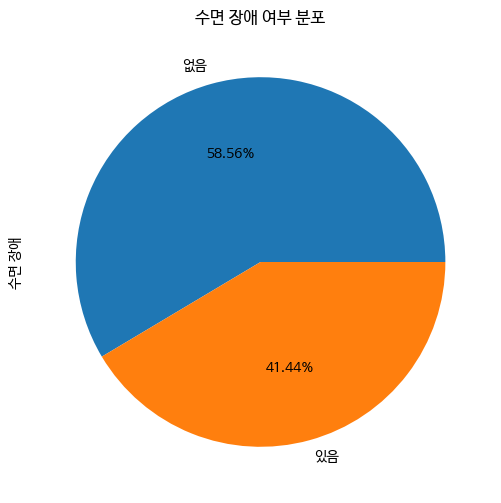

In [21]:
plt.figure(figsize=(10, 6))
lifestyle_df['수면 장애'].value_counts().plot.pie(autopct='%0.2f%%')
plt.title('수면 장애 여부 분포')
#plt.show()
FileSave()

##수면 장애 여부에 따른 남성과 여성의 수면의 질

sleepQuality_05.png 파일이 저장되었습니다.


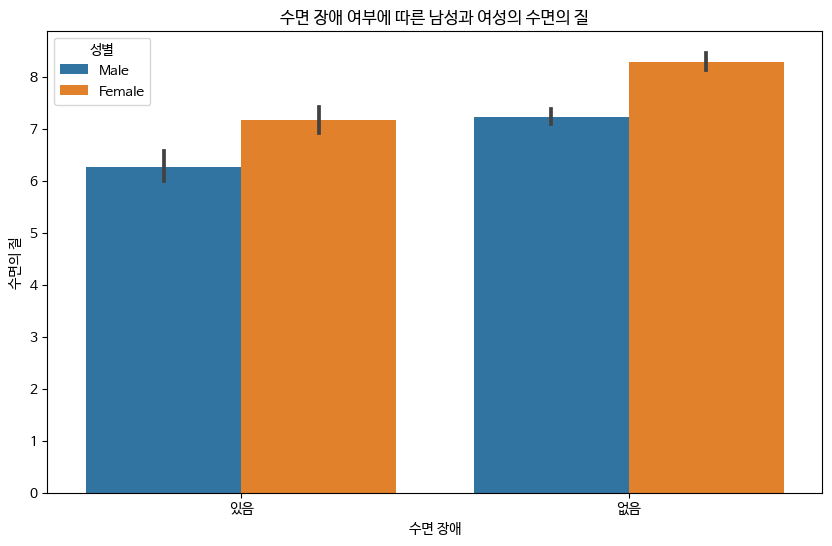

In [22]:
ORDERING = ['있음', '없음']
plt.figure(figsize=(10, 6))
sns.barplot(x='수면 장애', y='수면의 질', data=lifestyle_df, hue = '성별', order = ORDERING)
plt.title('수면 장애 여부에 따른 남성과 여성의 수면의 질')
#plt.show()
FileSave()

##수면 장애 여부에 따른 수면의 질

sleepQuality_06.png 파일이 저장되었습니다.


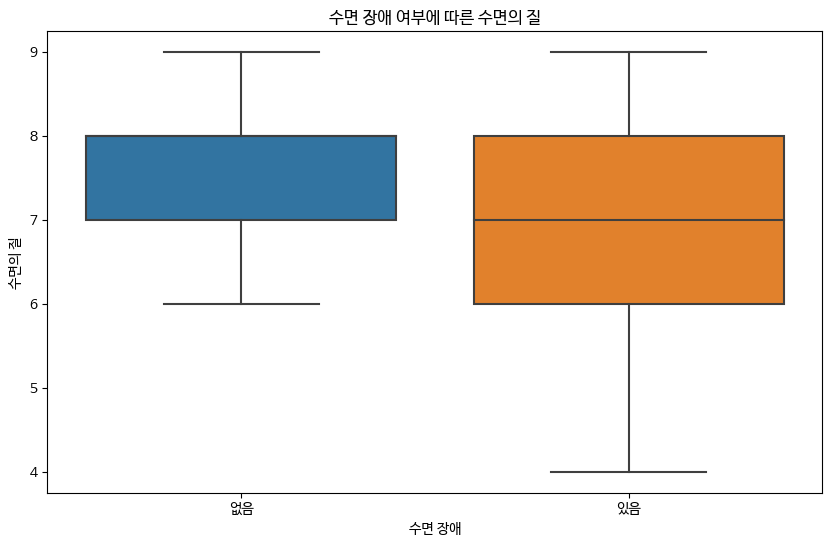

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='수면 장애', y='수면의 질', data=lifestyle_df)
plt.title('수면 장애 여부에 따른 수면의 질')
#plt.show()
FileSave()

##수면 장애 여부에 따른 연령대별 수면의 질

sleepQuality_07.png 파일이 저장되었습니다.


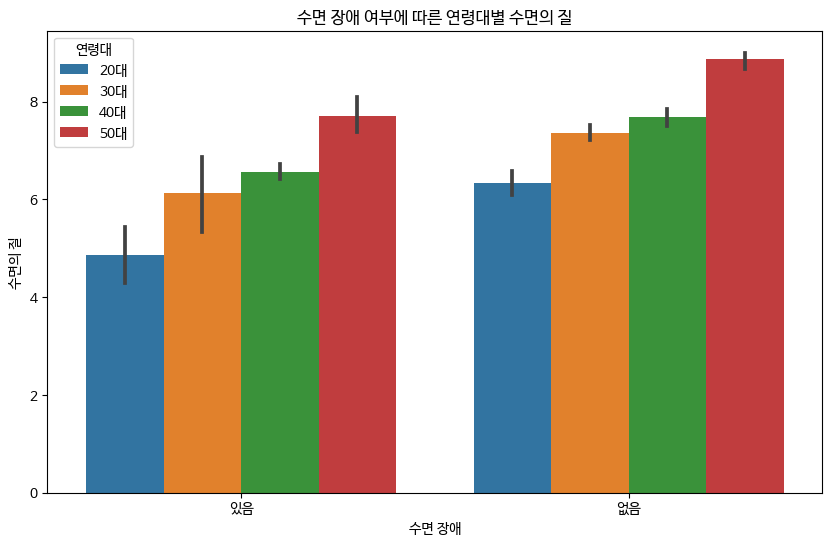

In [24]:
ORDERING = ['있음', '없음']
plt.figure(figsize=(10, 6))
sns.barplot(x='수면 장애', y='수면의 질', data=lifestyle_df, hue = '연령대', order = ORDERING)
plt.title('수면 장애 여부에 따른 연령대별 수면의 질')
#plt.show()
FileSave()

##신체 활동 수준과 수면의 질의 산점도

sleepQuality_13.png 파일이 저장되었습니다.


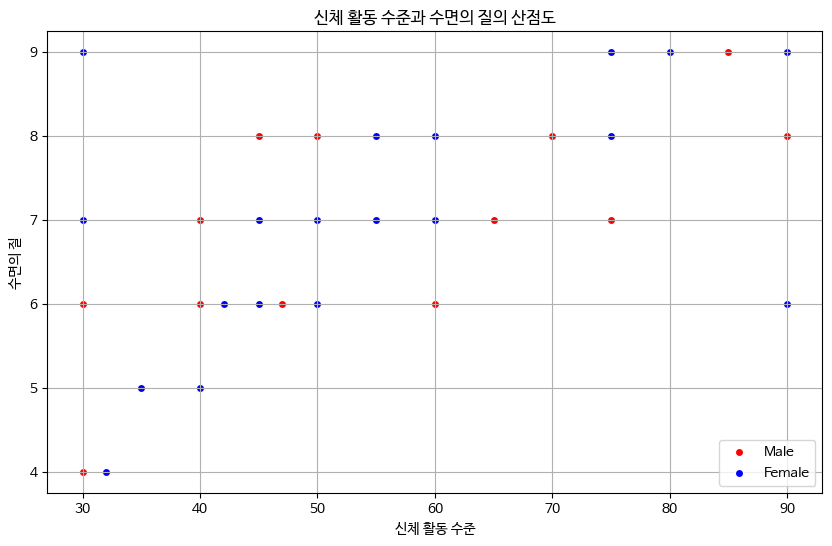

In [30]:
maledata = lifestyle_df[lifestyle_df['성별'] == 'Male']
femaledata = lifestyle_df[lifestyle_df['성별'] == 'Female']

male_physical = maledata['신체 활동 수준']
male_sleep = maledata['수면의 질']
female_physical = femaledata['신체 활동 수준']
female_sleep = femaledata['수면의 질']

plt.figure(figsize=(10, 6))
plt.scatter(male_physical, male_sleep, color='r', edgecolor='w', label='Male')
plt.scatter(female_physical, female_sleep, color='b', edgecolor='w', label='Female')

plt.xlabel('신체 활동 수준')
plt.ylabel('수면의 질')
plt.title('신체 활동 수준과 수면의 질의 산점도')
plt.legend()
plt.grid()
#plt.show()
FileSave()

##스트레스 수준과 수면의 질의 산점도

<ipython-input-26-b198f376be43>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='스트레스 수준', y='수면의 질', data=lifestyle_df, palette='dark')


sleepQuality_09.png 파일이 저장되었습니다.


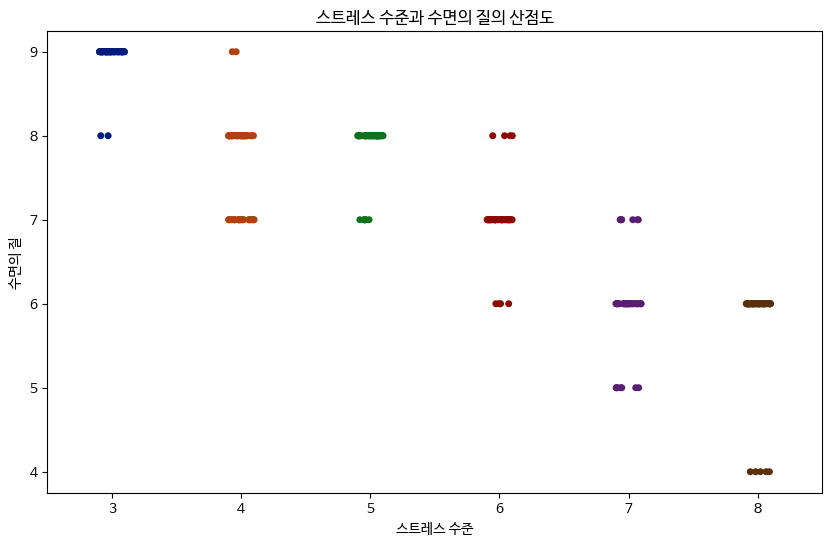

In [26]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='스트레스 수준', y='수면의 질', data=lifestyle_df, palette='dark')
plt.title('스트레스 수준과 수면의 질의 산점도')
#plt.show()
FileSave()

##수면의 질과 수면 시간의 산점도

<ipython-input-32-2193c864d22a>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='수면의 질', y='수면 시간', data=lifestyle_df, palette='dark')


sleepQuality_15.png 파일이 저장되었습니다.


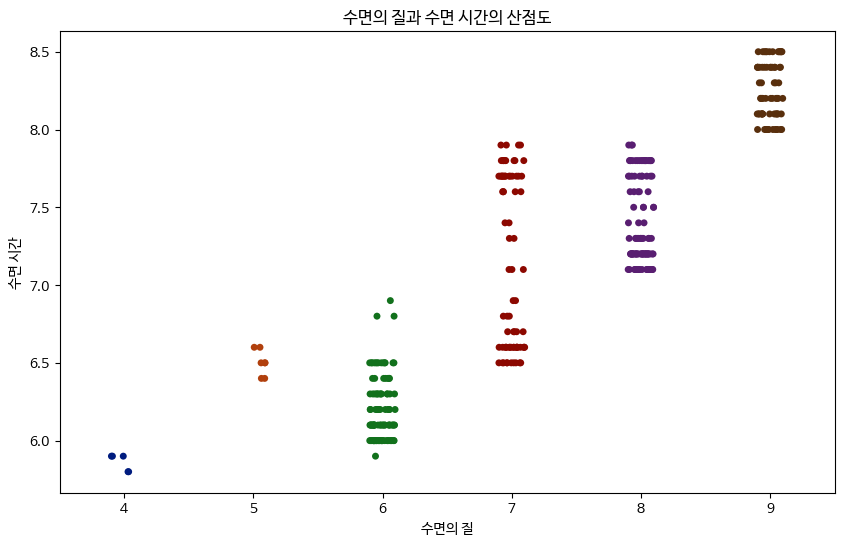

In [32]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='수면의 질', y='수면 시간', data=lifestyle_df, palette='dark')
plt.title('수면의 질과 수면 시간의 산점도')
#plt.show()
FileSave()

##수면의 질과 다른 변수들 간의 상관 관계

<ipython-input-31-ee7d647339c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = lifestyle_df.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
<ipython-input-20-b1a7de5d9e83>:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(savefile, dpi=400)


sleepQuality_11.png 파일이 저장되었습니다.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


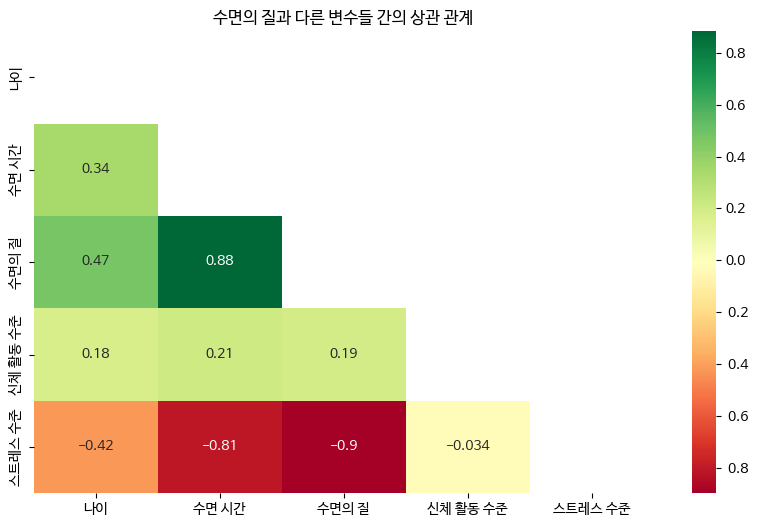

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = lifestyle_df.corr()
upp_mat = np.triu(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', mask = upp_mat)
plt.title('수면의 질과 다른 변수들 간의 상관 관계')
#plt.show()
FileSave()

##회귀분석

In [ ]:
col_mapping = {'Gender':'성별', 'Age':'나이', 'Sleep Duration':'수면시간', 'Quality of Sleep':'수면의질', 'Physical Activity Level':'신체활동수준', 'Stress Level':'스트레스수준', 'Sleep Disorder':'수면장애', 'Ageg':'연령대'}
df = data.rename(columns = col_mapping)
df.head()
from statsmodels.formula.api import ols

fit = ols('수면의질 ~ 나이 + 수면시간 + 신체활동수준  + 스트레스수준', data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   수면의질   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     762.7
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          6.44e-177
Time:                        09:22:26   Log-Likelihood:                -181.05
No. Observations:                 374   AIC:                             372.1
Df Residuals:                     369   BIC:                             391.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9571      0.439      9.023      0.0